In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import numpy as np
import math, re, os,random,shutil, csv
import matplotlib.pyplot as plt
import warnings
import glob
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
from collections import defaultdict


In [33]:

def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seed()

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

warnings.filterwarnings('ignore')

In [34]:

dataset = []
image_paths = []
labels = []


In [35]:
BATCH_SIZE = 128
IMG_SIZE = (224, 224)

# Create the combined dataset from the directory
dataset = tf.keras.utils.image_dataset_from_directory(
    'carpetas',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)   


class_names = dataset.class_names #nombres de las clases

Found 4508 files belonging to 40 classes.


In [36]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'directorios/train',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

Found 3138 files belonging to 40 classes.


In [37]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    'directorios/val',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

Found 388 files belonging to 40 classes.


In [38]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'directorios/test',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

Found 982 files belonging to 40 classes.


In [39]:
species_count = {species: 0 for species in class_names}

for _, labels in dataset:
    for label in labels:
        species_count[class_names[label]] += 1


# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de dataset')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')


plt.tight_layout()
plt.show()

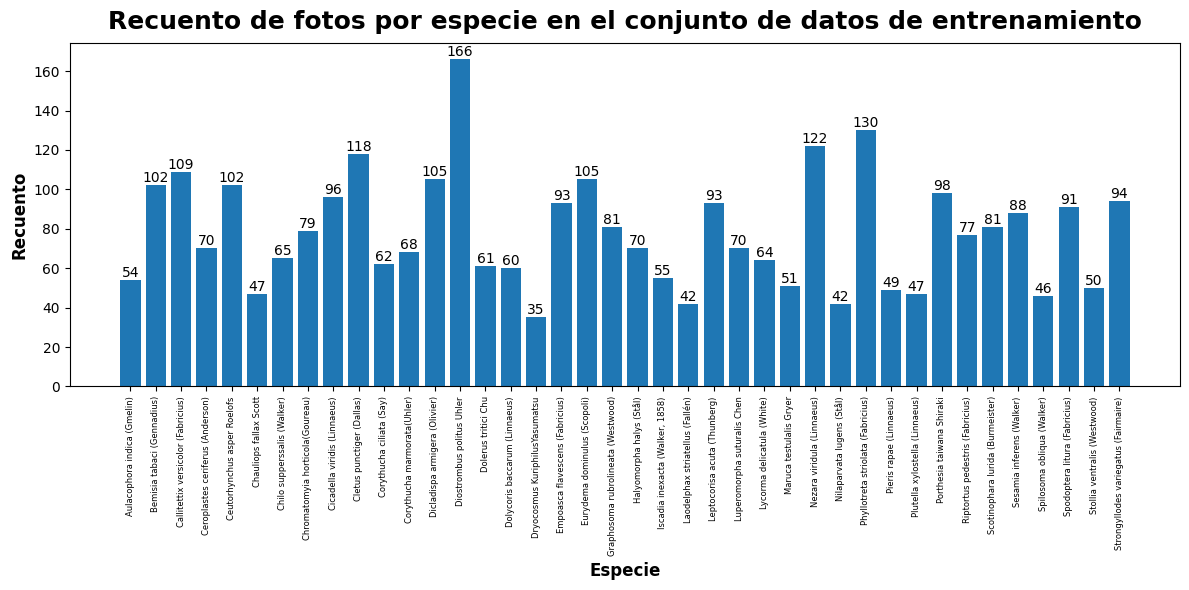

In [ ]:
species_count = {species: 0 for species in class_names}

for _, labels in train_dataset:
    for label in labels:
        species_count[class_names[label]] += 1

# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de datos de entrenamiento')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')

# Muestra el gráfico
plt.tight_layout()
plt.show()

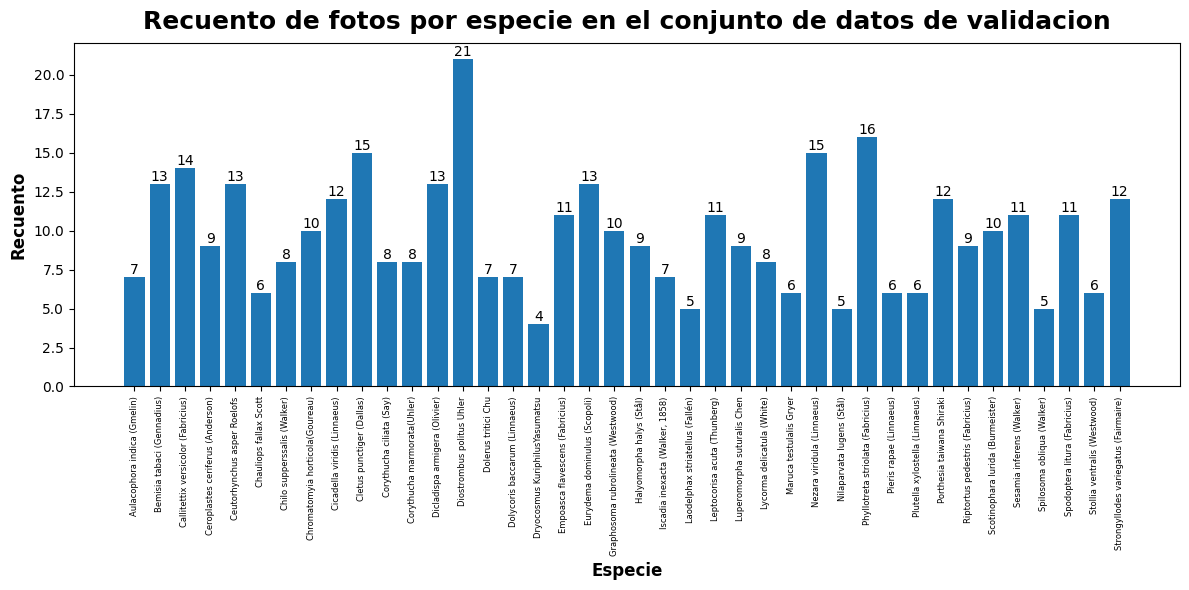

In [ ]:


species_count = {species: 0 for species in class_names}

for _, labels in val_dataset:
    for label in labels:
        species_count[class_names[label]] += 1

# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de datos de validacion')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')

# Muestra el gráfico
plt.tight_layout()
plt.show()


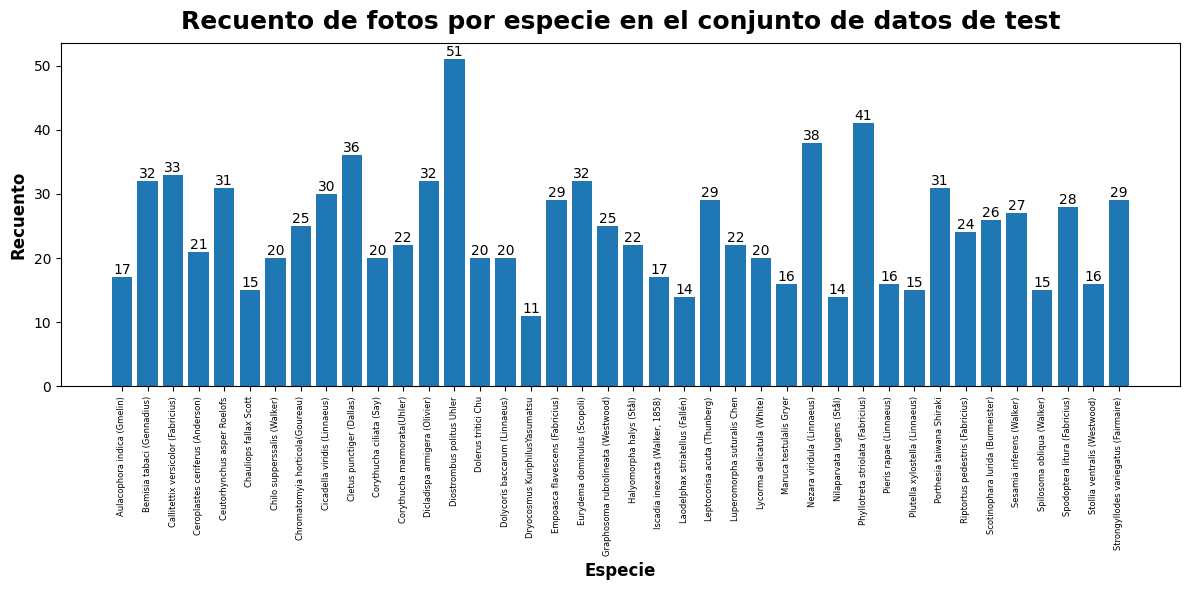

In [ ]:
species_count = {species: 0 for species in class_names}

for _, labels in test_dataset:
    for label in labels:
        species_count[class_names[label]] += 1

# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de datos de test')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [ ]:
def batch_to_numpy_images_and_labels(data):
    images, labels = data

    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    if numpy_labels.dtype == object: # binary string in this case,
                                     # these are image ID strings
        numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is
    # the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return class_names[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(class_names[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                class_names[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image.astype(int))
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize/1.5) if not red else int(titlesize/2.65), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)

def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]

    # auto-squaring: this will drop data that does not fit into square
    # or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows

    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = '' if label is None else class_names[label]
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)

    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()


In [ ]:
ds_iter = iter(train_dataset.unbatch().batch(20))

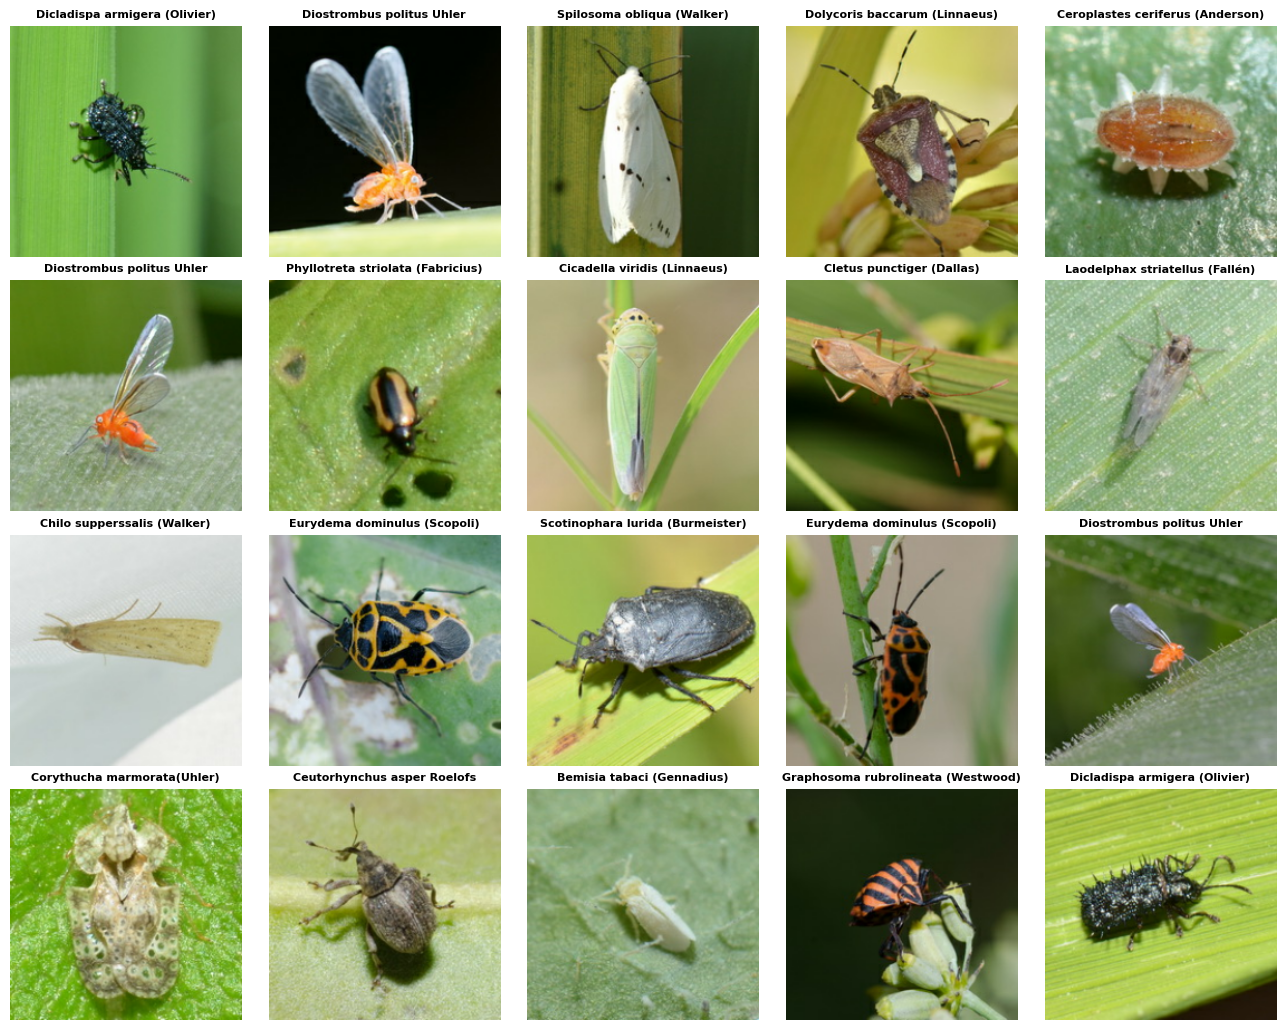

In [ ]:
one_batch = next(ds_iter)
display_batch_of_images(one_batch)

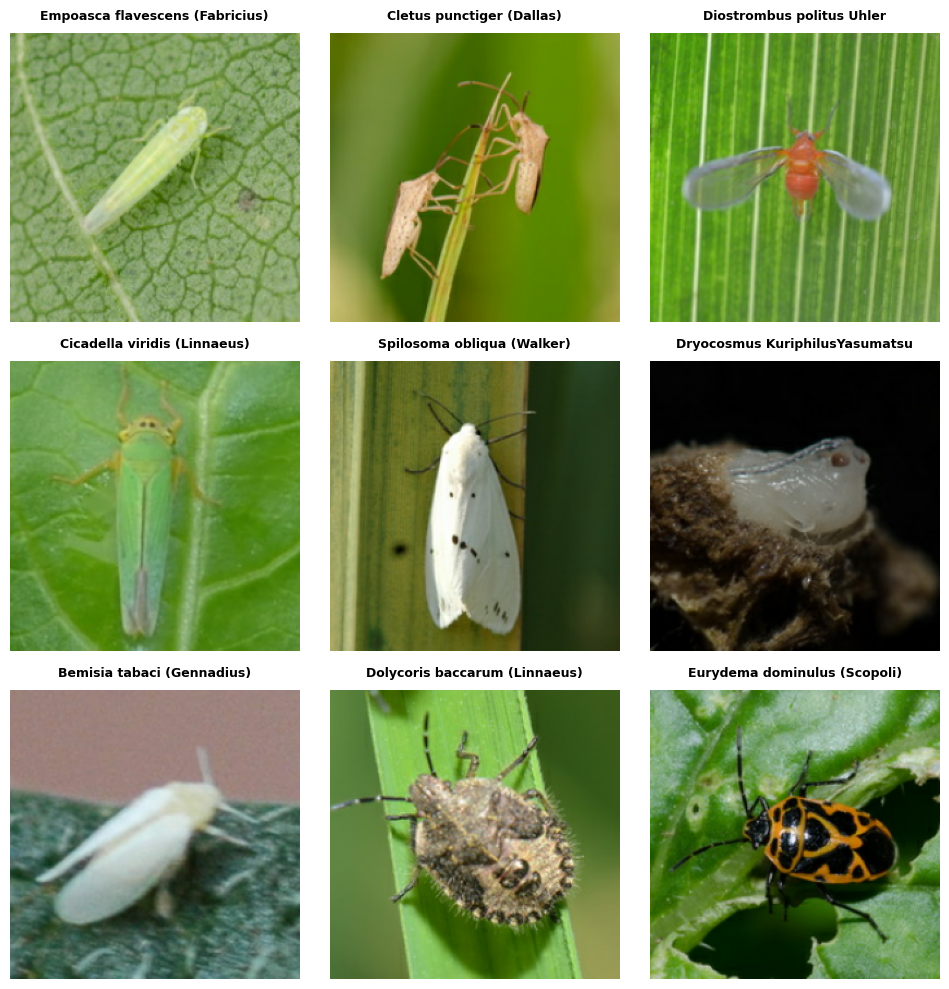

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]], fontsize = 9)
    plt.axis("off")


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


Usar aumento de datos

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])


In [ ]:
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


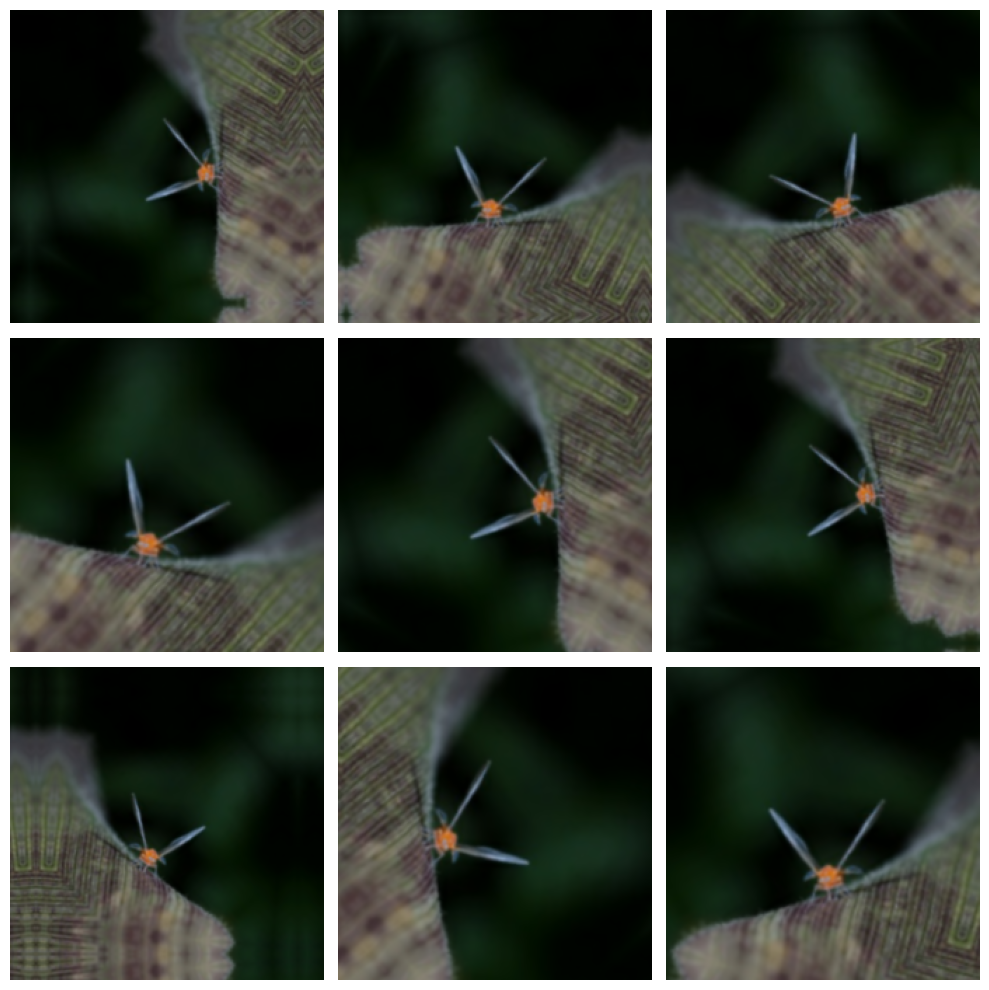

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


In [ ]:
initial_epochs = 1000

Learning rate schedule: 1e-05 to 5e-05 to 1e-05


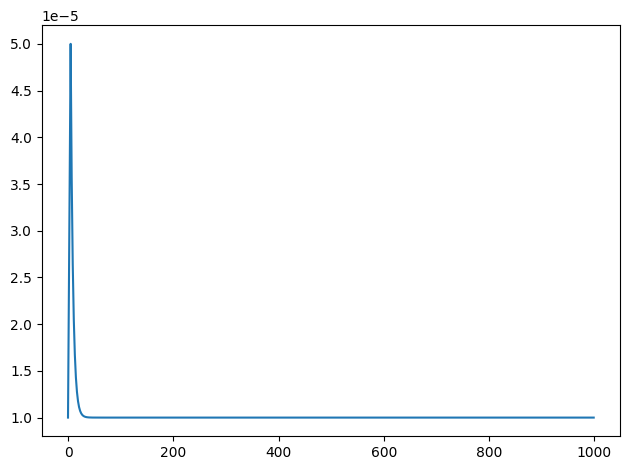

In [ ]:
def exponential_lr(epoch,
                   start_lr = 0.00001, min_lr = 0.00001, max_lr = 0.00005,
                   rampup_epochs = 5, sustain_epochs = 0,
                   exp_decay = 0.8):

    def lr(epoch, start_lr, min_lr, max_lr, rampup_epochs, sustain_epochs, exp_decay):
        # linear increase from start to rampup_epochs
        if epoch < rampup_epochs:
            lr = ((max_lr - start_lr) /
                  rampup_epochs * epoch + start_lr)
        # constant max_lr during sustain_epochs
        elif epoch < rampup_epochs + sustain_epochs:
            lr = max_lr
        # exponential decay towards min_lr
        else:
            lr = ((max_lr - min_lr) *
                  exp_decay**(epoch - rampup_epochs - sustain_epochs) +
                  min_lr)
        return lr
    return lr(epoch,
              start_lr,
              min_lr,
              max_lr,
              rampup_epochs,
              sustain_epochs,
              exp_decay)

lr_callback = tf.keras.callbacks.LearningRateScheduler(exponential_lr, verbose=True)

rng = [i for i in range(initial_epochs)]
y = [exponential_lr(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 100,
    min_delta = 0.001,
    restore_best_weights = True,
)

In [ ]:
preentreno = "xception"

In [ ]:
preprocess_input = tf.keras.applications.xception.preprocess_input

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
pretrained_base = tf.keras.applications.Xception(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')



In [ ]:
pretrained_base.trainable = False

In [ ]:
mutaciones = "amp_img"

In [ ]:

model = keras.Sequential([
    pretrained_base,
    data_augmentation,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.96, staircase=True)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset,
                    callbacks=[early_stopping],)


Epoch 1/1000


25/25 [==============================] - 154s 6s/step - loss: 10.9516 - sparse_categorical_accuracy: 0.1205 - val_loss: 10.7184 - val_sparse_categorical_accuracy: 0.1727
Epoch 2/1000
25/25 [==============================] - 155s 6s/step - loss: 8.5445 - sparse_categorical_accuracy: 0.2145 - val_loss: 7.9571 - val_sparse_categorical_accuracy: 0.3093
Epoch 3/1000
25/25 [==============================] - 137s 5s/step - loss: 7.5733 - sparse_categorical_accuracy: 0.2476 - val_loss: 6.8546 - val_sparse_categorical_accuracy: 0.3943
Epoch 4/1000
25/25 [==============================] - 140s 6s/step - loss: 6.7597 - sparse_categorical_accuracy: 0.2843 - val_loss: 6.0992 - val_sparse_categorical_accuracy: 0.3840
Epoch 5/1000
25/25 [==============================] - 143s 6s/step - loss: 6.1520 - sparse_categorical_accuracy: 0.3225 - val_loss: 5.4740 - val_sparse_categorical_accuracy: 0.4175
Epoch 6/1000
24/25 [===========================>..] - ETA: 6s - loss: 5.6602 - sparse_categorical_accuracy

KeyboardInterrupt: 

In [ ]:
nombre_guardado_congelado = 'species_recognition_model_xception'
model.save('modelos/' + nombre_guardado_congelado + '.h5')

<Axes: >

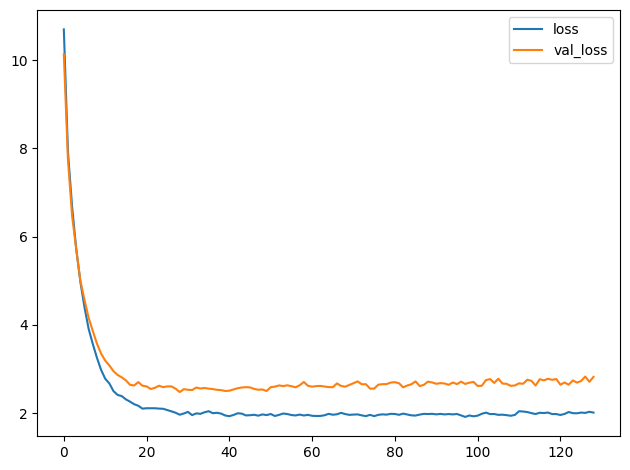

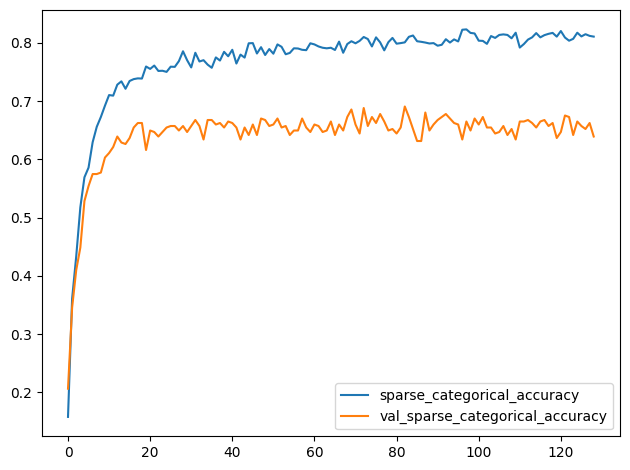

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss', 'val_loss']].plot()
history_frame.loc[:,['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization_5 (Bat  (None, 512)              

In [ ]:
pretrained_base.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(pretrained_base.layers))
part_congelada = len(pretrained_base.layers)*0.10
print("Number of layers in the base model  congelados: ", (int(part_congelada)))
for layer in pretrained_base.layers[:int(part_congelada)]:
  layer.trainable = False



Number of layers in the base model:  132
Number of layers in the base model  congelados:  13


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization_5 (Bat  (None, 512)              

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

In [ ]:
epochs_cont = initial_epochs + 1000

In [ ]:
history = model.fit(train_dataset,
                    initial_epoch=history.epoch[-1],
                    epochs=epochs_cont,
                    validation_data=validation_dataset,
                    callbacks=[early_stopping],)

Epoch 129/2000
25/25 [==============================] - 230s 9s/step - loss: 8.0941 - sparse_categorical_accuracy: 0.0421 - val_loss: 10.6739 - val_sparse_categorical_accuracy: 0.0567
Epoch 130/2000
25/25 [==============================] - 207s 8s/step - loss: 7.0820 - sparse_categorical_accuracy: 0.0704 - val_loss: 8.8143 - val_sparse_categorical_accuracy: 0.0567
Epoch 131/2000
25/25 [==============================] - 216s 9s/step - loss: 6.2041 - sparse_categorical_accuracy: 0.1160 - val_loss: 8.0610 - val_sparse_categorical_accuracy: 0.0670
Epoch 132/2000
25/25 [==============================] - 177s 7s/step - loss: 5.6002 - sparse_categorical_accuracy: 0.1644 - val_loss: 7.3384 - val_sparse_categorical_accuracy: 0.0644
Epoch 133/2000
25/25 [==============================] - 179s 7s/step - loss: 5.0919 - sparse_categorical_accuracy: 0.2078 - val_loss: 6.6350 - val_sparse_categorical_accuracy: 0.0773
Epoch 134/2000
25/25 [==============================] - 217s 9s/step - loss: 4.6479 

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss', 'val_loss']].plot()
history_frame.loc[:,['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()


In [ ]:
nombre_guardado = nombre_guardado_congelado + '_2'
model.save('modelos/' + nombre_guardado + '.h5')

In [ ]:

batch = iter(test_dataset.unbatch().batch(50))

In [ ]:
images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Blues')
    ax.set_xticks(range(len(class_names)))
    ax.set_xticklabels(class_names, fontdict={'fontsize': 7})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(class_names)))
    ax.set_yticklabels(class_names, fontdict={'fontsize': 7})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(101, 1, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()
    
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [ ]:
def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec
    # files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

In [ ]:
true_labels = []
predicted_labels = []

for image, label in test_dataset:
    true_labels.append(label)
    predicted_probs = model.predict(image)  # Realiza la predicción utilizando tu modelo
    predicted_label = np.argmax(predicted_probs, axis=1)
    predicted_labels.append(predicted_label)

true_labels = np.concatenate(true_labels)
predicted_labels = np.concatenate(predicted_labels)
#cmat = confusion_matrix(true_labels, predicted_labels, normalize='all')
cmat = confusion_matrix(true_labels, predicted_labels)


In [ ]:
loss, accuracy ,= model.evaluate(test_dataset)
score = f1_score(true_labels, predicted_labels, labels=labels, average='macro')
precision = precision_score(true_labels, predicted_labels, labels=labels, average='macro')
recall = recall_score(true_labels, predicted_labels, labels=labels, average='macro')

In [ ]:
print('Test accuracy :', accuracy)
print('Test loss :', loss)
print('Test recall_score :', recall)
print('Test precision_score :', precision)
print('Test f1_score :', score)


In [ ]:
results = [

    [preentreno, accuracy, precision, recall, score, nombre_guardado, mutaciones]
]

filename = 'results.csv'

with open(filename, mode='a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(results)

print('Los resultados se han guardado en', filename)

In [ ]:
print(cmat)

In [ ]:
fig, ax = plt.subplots(figsize=(22,22))

# Crea el mapa de calor de la matriz de confusión normalizada
sns.heatmap(cmat, annot=True, cmap='Blues', fmt='.0f', xticklabels=class_names, yticklabels=class_names, ax=ax)

# Establece el título y las etiquetas de los ejes
ax.set_title('Matriz de Confusión Normalizada')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')

# Muestra la figura
plt.show()

In [ ]:
score = f1_score(true_labels, predicted_labels, labels=labels, average='macro')
precision = precision_score(true_labels, predicted_labels, labels=labels, average='macro')
recall = recall_score(true_labels, predicted_labels, labels=labels, average='macro')
display_confusion_matrix(cmat, score, precision, recall)

In [ ]:
weights= model.layers[1].get_weights()[0]


In [ ]:
normalized_weights = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))

In [ ]:
plt.imshow(normalized_weights[:, :, 0, 0], cmap='gray')  # Visualiza los pesos del primer filtro
plt.colorbar()  # Agrega una barra de color para indicar los valores
plt.title('Pesos de la capa de convolución')
plt.show()

In [ ]:
conv_last_model = model.layers[-2].get_weights()[0]

In [ ]:
normalized_weights = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))

In [ ]:
plt.imshow(normalized_weights[:, :, 0, 0], cmap='gray')  # Visualiza los pesos del primer filtro
plt.colorbar()  # Agrega una barra de color para indicar los valores
plt.title('Pesos de la capa de convolución')
plt.show()

In [ ]:
batch = iter(test_dataset.unbatch().batch(1))

In [ ]:
image, labels = next(batch)

In [ ]:
first_conv_layer_output = model.layers[1].output  # Primera capa de convolución
last_conv_layer_output = model.layers[-3].output  # Última capa de convolución antes de la capa de salida

In [ ]:
first_conv_model = tf.keras.models.Model(inputs=model.inputs, outputs=first_conv_layer_output)
last_conv_model = tf.keras.models.Model(inputs=model.inputs, outputs=last_conv_layer_output)


In [ ]:
first_conv_features = first_conv_model.predict(image)
last_conv_features = last_conv_model.predict(image)


In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(first_conv_features[0, :, :, 0], cmap='gray')
plt.title('Primera capa de convolución')

plt.subplot(1, 2, 2)
plt.imshow(last_conv_features[0, :, :, 0], cmap='gray')
plt.title('Última capa de convolución')

plt.tight_layout()
plt.show()
